In [1]:
import tensorflow as tf
import os
import sys 
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
def visualise(path,number_of_images = 5):
    listOfFileNames = []
    for i in os.listdir(path):
        if os.path.isfile:
            listOfFileNames.append(os.path.join(path,i))
    fig, axes = plt.subplots(1,number_of_images,figsize=(20,5),facecolor='white')
    for i,name in enumerate(listOfFileNames[:number_of_images]):
        img = plt.imread(name)
        axes[i].axis('off')
        axes[i].imshow(img)
        axes[i].set_title(name)
    plt.show() 

In [2]:
classes =['one', 'fist', 'palm', 'three2']
classes

['one', 'fist', 'palm', 'three2']

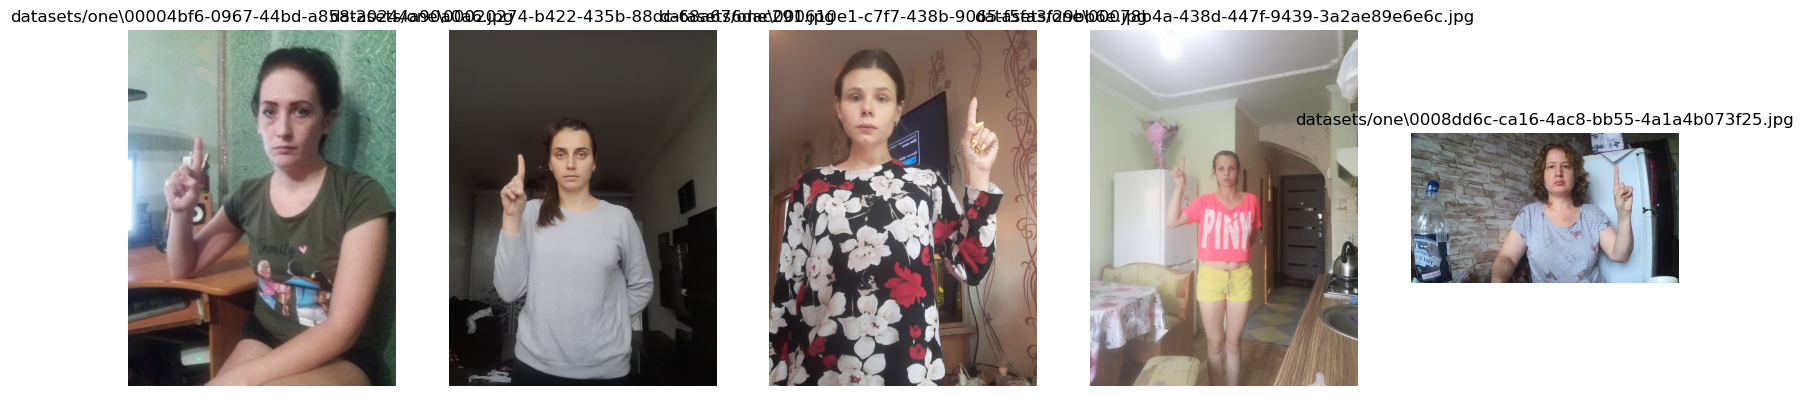

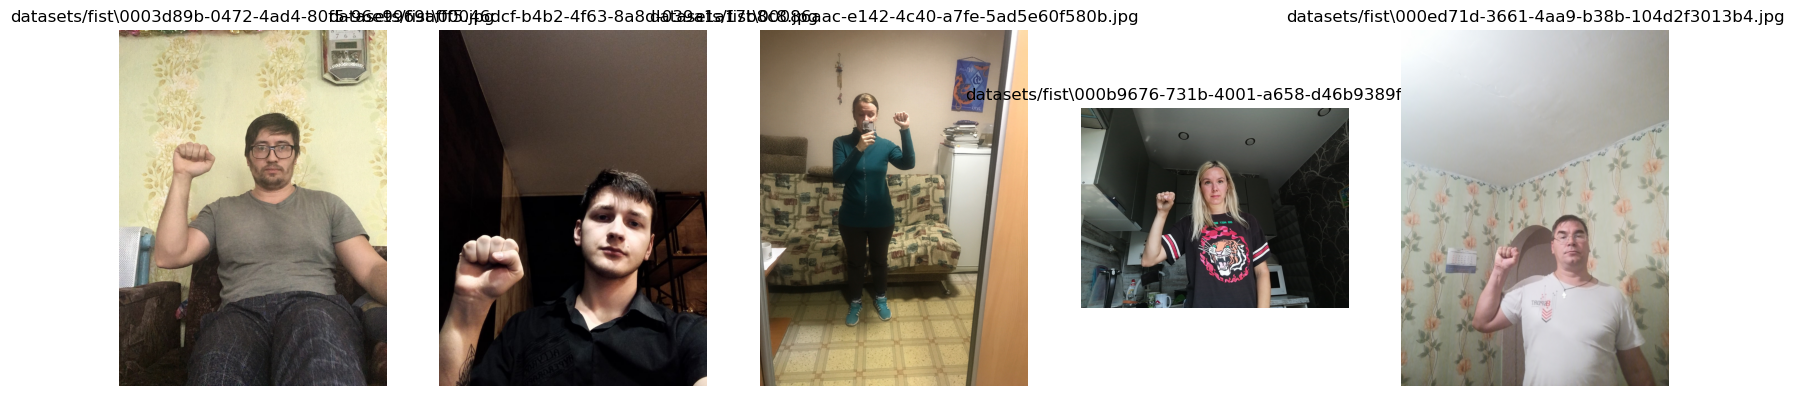

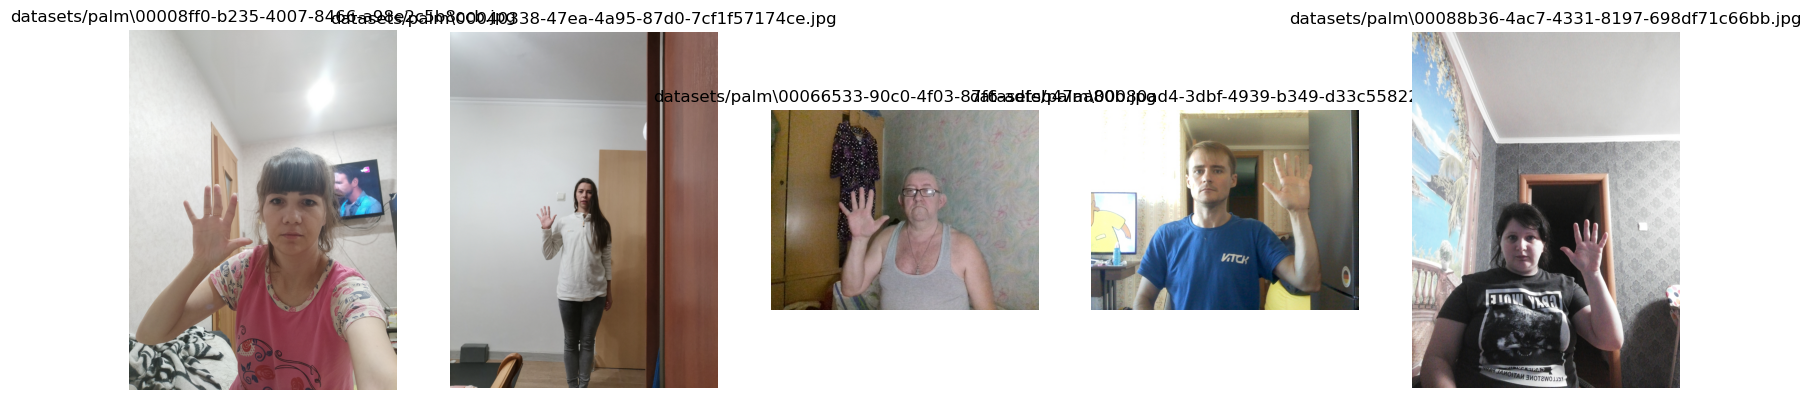

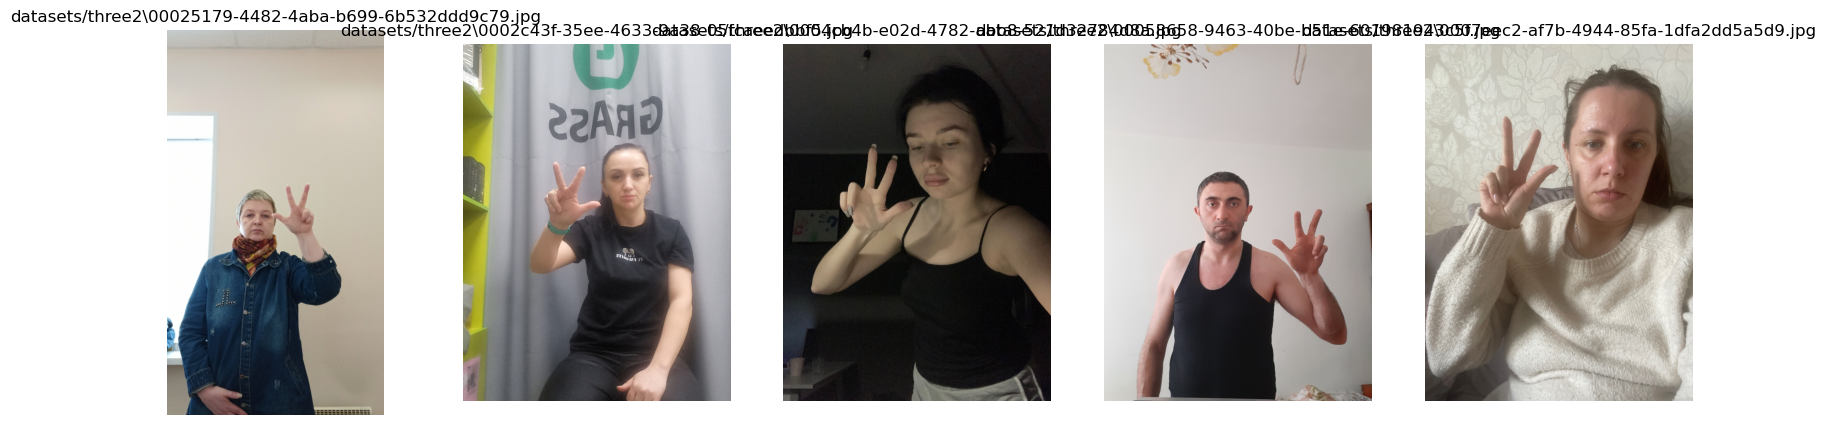

In [8]:
for class_ in classes:
    visualise(f"datasets/{class_}")

In [4]:
def loadImage(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

In [26]:
image = loadImage("datasets/palm/42ef1a10-15ee-4633-915b-0902ad560399.jpg")
print(image)
image=np.array(image)

<PIL.Image.Image image mode=RGB size=1440x1920 at 0x21794EB3400>


In [27]:
print(image)

[[[ 76  68  79]
  [ 78  68  77]
  [ 68  61  68]
  ...
  [139 125 116]
  [138 122 122]
  [142 123 129]]

 [[ 78  72  82]
  [ 80  72  83]
  [ 73  65  76]
  ...
  [135 123 111]
  [135 122 114]
  [133 119 116]]

 [[ 77  74  83]
  [ 77  71  83]
  [ 72  66  78]
  ...
  [135 127 108]
  [130 123 105]
  [125 117 104]]

 ...

 [[ 82  84 105]
  [ 77  79 100]
  [ 75  80 100]
  ...
  [145 157 157]
  [147 158 154]
  [145 152 145]]

 [[ 93  90 111]
  [ 87  85 106]
  [ 83  84 105]
  ...
  [149 159 160]
  [146 155 154]
  [145 147 144]]

 [[102  94 115]
  [ 99  94 116]
  [ 97  93 116]
  ...
  [150 160 161]
  [148 154 154]
  [144 144 144]]]


In [28]:
image.shape

(1920, 1440, 3)

In [3]:
batch_size = 16
img_height = 256
img_width = 256

In [4]:
trainingSet = tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=321,subset='training',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))
validationSet=tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=321,subset='validation',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))

Found 124751 files belonging to 4 classes.
Using 99801 files for training.
Found 124751 files belonging to 4 classes.
Using 24950 files for validation.


In [3]:
num_classes = len(classes)
print(num_classes)

4


In [125]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, 5, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, 7, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, 5, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, 5, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 5, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='valid', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes),
])

In [126]:
model_1.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [168]:
model_1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_20 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 256, 256, 64)      4864      
_________________________________________________________________
batch_normalization_49 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 122, 122, 128)     401536    
_________________________________________________________________
batch_normalization_50 (Batc (None, 122, 122, 128)   

In [128]:
epochs=25
hist = model1.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/25
3024/3024 [==============================] - 436s 142ms/step - loss: 1.2907 - accuracy: 0.4064 - val_loss: 1.1961 - val_accuracy: 0.5221
Epoch 2/25
3024/3024 [==============================] - 434s 143ms/step - loss: 1.0114 - accuracy: 0.7242 - val_loss: 1.0166 - val_accuracy: 0.7186
Epoch 3/25
3024/3024 [==============================] - 421s 139ms/step - loss: 0.9020 - accuracy: 0.8380 - val_loss: 0.9706 - val_accuracy: 0.7658
Epoch 4/25
3024/3024 [==============================] - 448s 148ms/step - loss: 0.8768 - accuracy: 0.8641 - val_loss: 1.0597 - val_accuracy: 0.6692
Epoch 5/25
3024/3024 [==============================] - 458s 151ms/step - loss: 0.8695 - accuracy: 0.8721 - val_loss: 0.8488 - val_accuracy: 0.8928
Epoch 6/25
3024/3024 [==============================] - 464s 153ms/step - loss: 0.8616 - accuracy: 0.8800 - val_loss: 0.8825 - val_accuracy: 0.8584
Epoch 7/25
3024/3024 [==============================] - 424s 140ms/step - loss: 0.8615 - accuracy: 0.8803 - val_

In [130]:
model_1.save_weights("weights/")

In [131]:
model_1.save("weights/h5/weights.h5")

In [6]:
resnet= tf.keras.applications.ResNet50(include_top=False, weights="imagenet",input_shape=(256,256,3))

In [67]:
flat = tf.keras.layers.Flatten()(resnet.output)
output = tf.keras.layers.Dense(num_classes,activation="sigmoid")(flat)
resnetSigmoidNew = tf.keras.Model(inputs=resnet.input,outputs=output)

In [68]:
resnetSigmoidNew.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [69]:
resnetSigmoidNew.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [49]:
epochs=10
histSigNew = resnetSigmoidNew.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/10
3024/3024 [==============================] - 321s 104ms/step - loss: 12.6841 - accuracy: 0.6643 - val_loss: 12.6952 - val_accuracy: 0.7209
Epoch 2/10
3024/3024 [==============================] - 311s 103ms/step - loss: 8.8499 - accuracy: 0.7859 - val_loss: 15.8079 - val_accuracy: 0.7152
Epoch 3/10
3024/3024 [==============================] - 305s 101ms/step - loss: 6.8340 - accuracy: 0.8334 - val_loss: 17.5576 - val_accuracy: 0.7282
Epoch 4/10
3024/3024 [==============================] - 310s 102ms/step - loss: 5.5671 - accuracy: 0.8664 - val_loss: 18.5116 - val_accuracy: 0.7440
Epoch 5/10
3024/3024 [==============================] - 308s 101ms/step - loss: 4.4163 - accuracy: 0.8917 - val_loss: 20.2676 - val_accuracy: 0.7429
Epoch 6/10
3024/3024 [==============================] - 306s 101ms/step - loss: 4.0833 - accuracy: 0.9039 - val_loss: 22.2991 - val_accuracy: 0.7417
Epoch 7/10
3024/3024 [==============================] - 307s 101ms/step - loss: 3.5847 - accuracy: 0.9159

In [51]:
resnetSigmoidNew.save("weights/resnet50Sigmoid.h5")

In [45]:
flatennlay = tf.keras.layers.Flatten()(resnet.output)
outputResnet = tf.keras.layers.Dense(num_classes)(flatennlay)
resnetSoftmax = tf.keras.Model(inputs=resnet.input,outputs=outputResnet)

In [46]:
resnetSoftmax.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
resnetSoftmax.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [48]:
epochs=20
historySoftmaxResnet = resnetSoftmax.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/20
1657/1657 [==============================] - 334s 196ms/step - loss: 10.7887 - accuracy: 0.5639 - val_loss: 11.7140 - val_accuracy: 0.6081
Epoch 2/20
1657/1657 [==============================] - 321s 193ms/step - loss: 7.7340 - accuracy: 0.7006 - val_loss: 13.3472 - val_accuracy: 0.6185
Epoch 3/20
1657/1657 [==============================] - 319s 192ms/step - loss: 6.3616 - accuracy: 0.7541 - val_loss: 14.2589 - val_accuracy: 0.6305
Epoch 4/20
1657/1657 [==============================] - 313s 188ms/step - loss: 5.3425 - accuracy: 0.7947 - val_loss: 15.3266 - val_accuracy: 0.6412
Epoch 5/20
1657/1657 [==============================] - 311s 187ms/step - loss: 4.5483 - accuracy: 0.8236 - val_loss: 18.8892 - val_accuracy: 0.6218
Epoch 6/20
  76/1657 [>.............................] - ETA: 4:30 - loss: 4.6758 - accuracy: 0.8250

KeyboardInterrupt: 

In [19]:
vggSoftmax3 = tf.keras.models.Sequential(layers=vgg19.layers)
vggSoftmax3.add(tf.keras.layers.Flatten())
vggSoftmax3.add(tf.keras.layers.Dense(1024, activation='relu'))
vggSoftmax3.add(tf.keras.layers.Dropout(0.25))
vggSoftmax3.add(tf.keras.layers.Dense(512, activation='relu'))
vggSoftmax3.add(tf.keras.layers.Dropout(0.25))
vggSoftmax3.add(tf.keras.layers.Dense(num_classes))
vggSoftmax3.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
vggSoftmax3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 64, 64, 256)      

In [23]:
epochs=10
historySoftmaxVgg19_3 = vggSoftmax3.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/10
3119/3119 [==============================] - 417s 133ms/step - loss: 1.7829 - accuracy: 0.3879 - val_loss: 1.1069 - val_accuracy: 0.5259
Epoch 2/10
3119/3119 [==============================] - 422s 135ms/step - loss: 1.2207 - accuracy: 0.4510 - val_loss: 1.0585 - val_accuracy: 0.5098
Epoch 3/10
3119/3119 [==============================] - 448s 144ms/step - loss: 1.1255 - accuracy: 0.4778 - val_loss: 0.9775 - val_accuracy: 0.5399
Epoch 4/10
2016/3119 [==================>...........] - ETA: 2:04 - loss: 1.2009 - accuracy: 0.4338

KeyboardInterrupt: 

In [30]:
batch_size = 32
img_height = 224
img_width = 224
trainingSet = tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=189,subset='training',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))
validationSet=tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=189,subset='validation',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))

Found 124751 files belonging to 4 classes.
Using 99801 files for training.
Found 124751 files belonging to 4 classes.
Using 24950 files for validation.


In [3]:
mobilenetV3Large = tf.keras.applications.MobileNetV3Large(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [18]:
mobilenetV3Large.trainable=False

In [17]:
mobilenetV3Large.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_3[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

In [25]:
flat= tf.keras.layers.Flatten()(mobilenetV3Large.output)
BN = tf.keras.layers.BatchNormalization()(flat)
D1 = tf.keras.layers.Dense(units=32,activation="relu")(BN)
outputmobilenetV3Large1 = tf.keras.layers.Dense(num_classes)(D1)
mobilenetV3Large1 = tf.keras.Model(inputs=mobilenetV3Large.input,outputs=outputmobilenetV3Large1)

mobilenetV3Large1.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
mobilenetV3Large1.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_3[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
____________________________________________________________________________________________

In [26]:
epochs=10
historymobilenetV3Large1 = mobilenetV3Large1.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/10
1560/1560 [==============================] - 295s 187ms/step - loss: 0.9649 - accuracy: 0.5727 - val_loss: 0.8887 - val_accuracy: 0.6046
Epoch 2/10
1560/1560 [==============================] - 312s 199ms/step - loss: 0.8619 - accuracy: 0.6225 - val_loss: 0.8744 - val_accuracy: 0.6107
Epoch 3/10
 139/1560 [=>............................] - ETA: 3:40 - loss: 0.8259 - accuracy: 0.6420

KeyboardInterrupt: 

In [4]:
mobilenetV3Large.trainable=True

In [28]:
flat= tf.keras.layers.Flatten()(mobilenetV3Large.output)
BN = tf.keras.layers.BatchNormalization()(flat)
D1 = tf.keras.layers.Dense(units=32,activation="relu")(BN)
outputmobilenetV3Large1 = tf.keras.layers.Dense(num_classes)(D1)
mobilenetV3Large1 = tf.keras.Model(inputs=mobilenetV3Large.input,outputs=outputmobilenetV3Large1)

mobilenetV3Large1.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
mobilenetV3Large1.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_3[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
____________________________________________________________________________________________

In [31]:
epochs=10
historymobilenetV3Large1 = mobilenetV3Large1.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/10
3119/3119 [==============================] - 460s 146ms/step - loss: 0.2188 - accuracy: 0.9209 - val_loss: 0.5122 - val_accuracy: 0.8929
Epoch 2/10
3119/3119 [==============================] - 448s 143ms/step - loss: 0.1092 - accuracy: 0.9623 - val_loss: 0.1395 - val_accuracy: 0.9587
Epoch 3/10
3119/3119 [==============================] - 467s 149ms/step - loss: 0.0871 - accuracy: 0.9699 - val_loss: 0.1618 - val_accuracy: 0.9555
Epoch 4/10
3119/3119 [==============================] - 477s 153ms/step - loss: 0.0955 - accuracy: 0.9674 - val_loss: 0.0952 - val_accuracy: 0.9679
Epoch 5/10
3119/3119 [==============================] - 456s 146ms/step - loss: 0.0597 - accuracy: 0.9791 - val_loss: 0.1274 - val_accuracy: 0.9607
Epoch 6/10
3119/3119 [==============================] - 447s 143ms/step - loss: 0.0556 - accuracy: 0.9807 - val_loss: 0.0933 - val_accuracy: 0.9719
Epoch 7/10
3119/3119 [==============================] - 454s 145ms/step - loss: 0.0461 - accuracy: 0.9840 - val_

In [34]:
mobilenetV3Large1.save("weights/mobilenetV3Large1.h5")

In [35]:
resnet.trainable=True

In [2]:
batch_size=32
img_height = 224
img_width = 224
trainingSet = tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=321,subset='training',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))
validationSet=tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=321,subset='validation',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))

Found 124751 files belonging to 4 classes.
Using 99801 files for training.
Found 124751 files belonging to 4 classes.
Using 24950 files for validation.


In [53]:
flat= tf.keras.layers.Flatten()(mobilenetV3Large.output)
BN = tf.keras.layers.BatchNormalization()(flat)
D1 = tf.keras.layers.Dense(units=32,activation="relu")(BN)
outputmobilenetV3Large2 = tf.keras.layers.Dense(num_classes,activation='sigmoid')(D1)
mobilenetV3Large2 = tf.keras.Model(inputs=mobilenetV3Large.input,outputs=outputmobilenetV3Large2)

mobilenetV3Large2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
mobilenetV3Large2.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_3[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________________

In [57]:
epochs=5
historymobilenetV3Large2 = mobilenetV3Large2.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/5
3119/3119 [==============================] - 467s 150ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0567 - val_accuracy: 0.9821
Epoch 2/5
3119/3119 [==============================] - 460s 147ms/step - loss: 0.0361 - accuracy: 0.9878 - val_loss: 0.0600 - val_accuracy: 0.9788
Epoch 3/5
3119/3119 [==============================] - 472s 151ms/step - loss: 0.0390 - accuracy: 0.9875 - val_loss: 0.1226 - val_accuracy: 0.9827
Epoch 4/5
3119/3119 [==============================] - 442s 141ms/step - loss: 0.0278 - accuracy: 0.9904 - val_loss: 0.0720 - val_accuracy: 0.9810
Epoch 5/5
3119/3119 [==============================] - 442s 141ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0556 - val_accuracy: 0.9827


In [58]:
mobilenetV3Large2.save("weights/mobilenetV3Large2.h5")

In [15]:
flat= tf.keras.layers.Flatten()(mobilenetV3Large.output)
BN = tf.keras.layers.BatchNormalization()(flat)
D1 = tf.keras.layers.Dense(units=256,activation="relu")(BN)
D2 = tf.keras.layers.Dense(units=128,activation="relu")(D1)
D3 = tf.keras.layers.Dense(units=64,activation="relu")(D2)
D4 = tf.keras.layers.Dense(units=16,activation="relu")(D3)
outputmobilenetV3LargeNew = tf.keras.layers.Dense(num_classes)(D4)
mobilenetV3LargeNew = tf.keras.Model(inputs=mobilenetV3Large.input,outputs=outputmobilenetV3LargeNew)

mobilenetV3LargeNew.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
mobilenetV3LargeNew.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
____________________________________________________________________________________________

In [16]:
epochs = 25
historymobilenetV3LargeNew = mobilenetV3LargeNew.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/25
3119/3119 [==============================] - 461s 146ms/step - loss: 0.2049 - accuracy: 0.9281 - val_loss: 0.6907 - val_accuracy: 0.9162
Epoch 2/25
3119/3119 [==============================] - 449s 144ms/step - loss: 0.1098 - accuracy: 0.9626 - val_loss: 0.1229 - val_accuracy: 0.9599
Epoch 3/25
3119/3119 [==============================] - 450s 144ms/step - loss: 0.0870 - accuracy: 0.9705 - val_loss: 0.1188 - val_accuracy: 0.9565
Epoch 4/25
3119/3119 [==============================] - 450s 144ms/step - loss: 0.0760 - accuracy: 0.9741 - val_loss: 0.2822 - val_accuracy: 0.9460
Epoch 5/25
3119/3119 [==============================] - 443s 142ms/step - loss: 0.0645 - accuracy: 0.9787 - val_loss: 0.0908 - val_accuracy: 0.9718
Epoch 6/25
3119/3119 [==============================] - 443s 142ms/step - loss: 0.0619 - accuracy: 0.9790 - val_loss: 0.0968 - val_accuracy: 0.9710
Epoch 7/25
3119/3119 [==============================] - 443s 142ms/step - loss: 0.0580 - accuracy: 0.9813 - val_

In [18]:
flat= tf.keras.layers.Flatten()(mobilenetV3Large.output)
BN = tf.keras.layers.BatchNormalization()(flat)
D1 = tf.keras.layers.Dense(units=512,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01))(BN)
D2 = tf.keras.layers.Dense(units=256,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01))(D1)
D3 = tf.keras.layers.Dense(units=128,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01))(D2)
D4 = tf.keras.layers.Dense(units=32,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01))(D3)
outputmobilenetV3LargeNew2 = tf.keras.layers.Dense(num_classes)(D4)
mobilenetV3LargeNew2 = tf.keras.Model(inputs=mobilenetV3Large.input,outputs=outputmobilenetV3LargeNew2)

mobilenetV3LargeNew2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
mobilenetV3LargeNew2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
____________________________________________________________________________________________

In [19]:
epochs = 25
historymobilenetV3LargeNew2 = mobilenetV3LargeNew2.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/25
3119/3119 [==============================] - 446s 141ms/step - loss: 0.2699 - accuracy: 0.9931 - val_loss: 0.1265 - val_accuracy: 0.9792
Epoch 2/25
3119/3119 [==============================] - 440s 141ms/step - loss: 0.0550 - accuracy: 0.9947 - val_loss: 0.1059 - val_accuracy: 0.9807
Epoch 3/25
3119/3119 [==============================] - 440s 141ms/step - loss: 0.0488 - accuracy: 0.9942 - val_loss: 0.0955 - val_accuracy: 0.9792
Epoch 4/25
3119/3119 [==============================] - 439s 140ms/step - loss: 0.0392 - accuracy: 0.9957 - val_loss: 0.1024 - val_accuracy: 0.9794
Epoch 5/25
3119/3119 [==============================] - 439s 141ms/step - loss: 0.0398 - accuracy: 0.9948 - val_loss: 0.1035 - val_accuracy: 0.9760
Epoch 6/25
3119/3119 [==============================] - 436s 139ms/step - loss: 0.0340 - accuracy: 0.9956 - val_loss: 0.0933 - val_accuracy: 0.9804
Epoch 7/25
3119/3119 [==============================] - 436s 139ms/step - loss: 0.0333 - accuracy: 0.9956 - val_

In [20]:
resnet50 = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [21]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [27]:
flat= tf.keras.layers.Flatten()(resnet50.output)
BN = tf.keras.layers.BatchNormalization()(flat)
D1 = tf.keras.layers.Dense(units=32,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01))(BN)
D2 = tf.keras.layers.Dense(units=16,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01))(D1)
outputresnet50 = tf.keras.layers.Dense(num_classes)(D2)
resnet50_1 = tf.keras.Model(inputs=resnet50.input,outputs=outputresnet50)

resnet50_1.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
resnet50_1.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [25]:
resnet50.trainable=True

In [28]:
epochs = 15
historyresnet50_1 = resnet50_1.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/15
 156/3119 [>.............................] - ETA: 8:54 - loss: 1.8440 - accuracy: 0.2574

KeyboardInterrupt: 

In [29]:
EfficientNetB2 = tf.keras.applications.EfficientNetB2(include_top=False,
    weights="imagenet",input_shape=(224,224,3))

31801344/31790344 [==============================] - 7s 0us/step


In [30]:
EfficientNetB2.trainable=True

In [31]:
EfficientNetB2.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [45]:
flat= tf.keras.layers.Flatten()(EfficientNetB2.output)
BN = tf.keras.layers.BatchNormalization()(flat)
D1 = tf.keras.layers.Dense(units=128,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.1))(BN)
D2 = tf.keras.layers.Dense(units=32,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.1))(D1)
outputEfficientNetB2_1 = tf.keras.layers.Dense(num_classes)(D2)
EfficientNetB2_1 = tf.keras.Model(inputs=EfficientNetB2.input,outputs=outputEfficientNetB2_1)

EfficientNetB2_1.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
EfficientNetB2_1.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
___________________________________________________________________________________________

In [46]:
batch_size=16
img_height = 224
img_width = 224
trainingSet = tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=321,subset='training',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))
validationSet=tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=321,subset='validation',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))

Found 124751 files belonging to 4 classes.
Using 99801 files for training.
Found 124751 files belonging to 4 classes.
Using 24950 files for validation.


In [47]:
epochs = 10
historyEfficientNetB2_1 = EfficientNetB2_1.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs
)

Epoch 1/10
6238/6238 [==============================] - 1084s 172ms/step - loss: 1.6474 - accuracy: 0.8977 - val_loss: 0.5448 - val_accuracy: 0.9429
Epoch 2/10
6238/6238 [==============================] - 1065s 171ms/step - loss: 0.4615 - accuracy: 0.9440 - val_loss: 0.4558 - val_accuracy: 0.9485
Epoch 3/10
6238/6238 [==============================] - 1060s 170ms/step - loss: 0.3020 - accuracy: 0.9594 - val_loss: 0.1775 - val_accuracy: 0.9737
Epoch 4/10
6238/6238 [==============================] - 1071s 172ms/step - loss: 0.2505 - accuracy: 0.9677 - val_loss: 0.2678 - val_accuracy: 0.9727
Epoch 5/10
6238/6238 [==============================] - 1112s 178ms/step - loss: 0.2171 - accuracy: 0.9715 - val_loss: 0.1332 - val_accuracy: 0.9783
Epoch 6/10
6238/6238 [==============================] - 1074s 172ms/step - loss: 0.1995 - accuracy: 0.9752 - val_loss: 0.1245 - val_accuracy: 0.9776
Epoch 7/10
6238/6238 [==============================] - 1078s 173ms/step - loss: 0.1916 - accuracy: 0.9775

In [48]:
EfficientNetB2_1.save("weights/EfficientNetB2_1.h5")

D:\anaconda3\envs\DeepLearning1_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [58]:
flat= tf.keras.layers.Flatten()(mobilenetV3Large.output)
BN = tf.keras.layers.BatchNormalization()(flat)
D1 = tf.keras.layers.Dense(units=512,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.1))(BN)
D2 = tf.keras.layers.Dense(units=256,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.1))(D1)
D3 = tf.keras.layers.Dense(units=128,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.1))(D2)
D4 = tf.keras.layers.Dense(units=32,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.1))(D3)
outputmobilenetV3LargeNew4 = tf.keras.layers.Dense(num_classes)(D4)
mobilenetV3LargeNew4 = tf.keras.Model(inputs=mobilenetV3Large.input,outputs=outputmobilenetV3LargeNew4)

mobilenetV3LargeNew4.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
mobilenetV3LargeNew4.summary()

Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________________

In [4]:
batch_size=32
img_height = 224
img_width = 224
trainingSet = tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=321,subset='training',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))
validationSet=tf.keras.utils.image_dataset_from_directory(directory="datasets",labels="inferred",validation_split=0.2,seed=321,subset='validation',label_mode="int",batch_size=batch_size,image_size = (img_height,img_width))

Found 124751 files belonging to 4 classes.
Using 99801 files for training.
Found 124751 files belonging to 4 classes.
Using 24950 files for validation.


In [59]:
checkpoint_filepath = 'weights/mobilenetV3LargeNew4.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose= 1)

In [60]:
epochs = 25
historymobilenetV3LargeNew4 = mobilenetV3LargeNew4.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/25
3119/3119 [==============================] - 503s 160ms/step - loss: 1.2614 - accuracy: 0.9974 - val_loss: 0.2169 - val_accuracy: 0.9829

Epoch 00001: val_accuracy improved from -inf to 0.98289, saving model to weights\mobilenetV3LargeNew4.h5
Epoch 2/25
3119/3119 [==============================] - 451s 144ms/step - loss: 0.2279 - accuracy: 0.9963 - val_loss: 0.1720 - val_accuracy: 0.9843

Epoch 00002: val_accuracy improved from 0.98289 to 0.98429, saving model to weights\mobilenetV3LargeNew4.h5
Epoch 3/25
3119/3119 [==============================] - 512s 164ms/step - loss: 0.1247 - accuracy: 0.9979 - val_loss: 0.1646 - val_accuracy: 0.9814

Epoch 00003: val_accuracy did not improve from 0.98429
Epoch 4/25
3119/3119 [==============================] - 455s 145ms/step - loss: 0.1906 - accuracy: 0.9964 - val_loss: 0.1469 - val_accuracy: 0.9816

Epoch 00004: val_accuracy did not improve from 0.98429
Epoch 5/25
3119/3119 [==============================] - 469s 150ms/step - loss: 0

KeyboardInterrupt: 

In [5]:
EfficentNetB2_reloaded = tf.keras.models.load_model('weights/EfficientNetB2_1.h5')

In [6]:
EfficentNetB2_reloaded.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
___________________________________________________________________________________________

In [7]:
checkpoint_filepath = 'weights/EfficentNetB2_reloaded.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose= 1)

In [8]:
epochs = 15
historymobilenetV3LargeNew4 = EfficentNetB2_reloaded.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/15
3119/3119 [==============================] - 984s 312ms/step - loss: 0.0556 - accuracy: 0.9918 - val_loss: 0.0685 - val_accuracy: 0.9852

Epoch 00001: val_accuracy improved from -inf to 0.98517, saving model to weights\EfficentNetB2_reloaded.h5


D:\anaconda3\envs\DeepLearning1_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/15
3119/3119 [==============================] - 961s 308ms/step - loss: 0.0743 - accuracy: 0.9913 - val_loss: 0.0640 - val_accuracy: 0.9874

Epoch 00002: val_accuracy improved from 0.98517 to 0.98737, saving model to weights\EfficentNetB2_reloaded.h5
Epoch 3/15
3119/3119 [==============================] - 942s 302ms/step - loss: 0.0632 - accuracy: 0.9926 - val_loss: 0.0684 - val_accuracy: 0.9874

Epoch 00003: val_accuracy did not improve from 0.98737
Epoch 4/15
3119/3119 [==============================] - 944s 303ms/step - loss: 0.0746 - accuracy: 0.9923 - val_loss: 0.0563 - val_accuracy: 0.9881

Epoch 00004: val_accuracy improved from 0.98737 to 0.98814, saving model to weights\EfficentNetB2_reloaded.h5
Epoch 5/15
3119/3119 [==============================] - 941s 302ms/step - loss: 0.0742 - accuracy: 0.9931 - val_loss: 0.0684 - val_accuracy: 0.9865

Epoch 00005: val_accuracy did not improve from 0.98814
Epoch 6/15
3119/3119 [==============================] - 989s 317ms/step - 

In [9]:
mobilenetV3LargeNew4_reloaded = tf.keras.models.load_model('weights/mobilenetV3LargeNew4.h5')

In [10]:
checkpoint_filepath1 = 'weights/mobilenetV3LargeNew4_reloaded.h5'
model_checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose= 1)

In [11]:
epochs = 15
historymobilenetV3LargeNew4_reloaded = mobilenetV3LargeNew4_reloaded.fit(
  trainingSet,
  validation_data=validationSet,
  epochs=epochs,
    callbacks=[model_checkpoint_callback1]
)

Epoch 1/15
3119/3119 [==============================] - 458s 145ms/step - loss: 0.1245 - accuracy: 0.9980 - val_loss: 0.1632 - val_accuracy: 0.9830

Epoch 00001: val_accuracy improved from -inf to 0.98301, saving model to weights\mobilenetV3LargeNew4_reloaded.h5
Epoch 2/15
3119/3119 [==============================] - 463s 148ms/step - loss: 0.1320 - accuracy: 0.9970 - val_loss: 0.1462 - val_accuracy: 0.9825

Epoch 00002: val_accuracy did not improve from 0.98301
Epoch 3/15
3119/3119 [==============================] - 553s 177ms/step - loss: 0.1038 - accuracy: 0.9977 - val_loss: 0.1488 - val_accuracy: 0.9806

Epoch 00003: val_accuracy did not improve from 0.98301
Epoch 4/15
  38/3119 [..............................] - ETA: 6:41 - loss: 0.0781 - accuracy: 0.9984

KeyboardInterrupt: 